<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_1/RC_tempo_%2B_frequenza_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

retta_fit_xba(x, b,a)

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle)

#Librerie


In [ ]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [ ]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [ ]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = range(1,dimensione+1,1)

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione")
	plt.ylabel(stringa_ytitle)
	plt.xlabel("Numero misura")
	plt.grid()

#RC tempo


Parte teorica:

$V(t) = V_0 *e^{-t/\tau}$

Linearizzando otteniamo che:

$y = ln(V_0) + (-t/\tau)$

Ricaviamo quindi:

$\tau = -1/b_{fit}$

e il relativo errore (propagazione):

$\sigma_{\tau} = \frac{\sigma_b^2}{b^2}$

A livello di dati di laboratorio, la procedura implica che l'asse delle x contenza il tempo, la cui unità di misura coinciderà con quella di $\tau$, mentra l'asse delle y conterrà $ln(V_{out})$, entrambe misure prese tramite i cursori direttamente dall'oscilloscopio.

L'errore su $V_{out}$ si ottiene come segue:

$\sqrt{(\frac{1}{10}*div)^2 + (\frac{3}{100}*lettura)^2}$

e l'errore per il lovaritmo di $V_{out}$:

$\frac{errore \ sul \ V}{valore \ di \ V}$

In [2]:
v_in = 5.00    #[V]
R = 81.597     #[kohm]
C = 6.57       #[nanoF]

tau_teorico = R*C

print(tau_teorico, "[microsecondi]")

536.0922899999999 [microsecondi]


In [3]:
#dati
zero_cavo_bnc = 9.68                                                                         #[ms]
zero_sonda = 10                                                                              #[ms]
cavo_bnc_v = [3.76,3.08 ,2.56 ,2.12 ,1.72 ,1.44 ,1.20 , 0.96 ,0.8 ,0.68 ,0.56]               #[V]
cavo_bnc_t_raw = [9.8, 9.9 ,10, 10.10,10.20 ,10.30 ,10.40 ,10.50 ,10.60,10.70 ,10.8 ]        #[ms]
cavo_bnc_t = []
cavo_bnc_v_log = []
sonda_v = [4.12, 3.44, 2.88, 2.40, 2.00, 1.64, 1.40, 1.16, 0.96, 0.80, 0.68 ]                #[V]
sonda_t_raw = [10.10, 10.20, 10.30, 10.40, 10.50, 10.60, 10.70, 10.80, 10.90, 11.00, 11.10 ] #[ms]
sonda_t = []
sonda_v_log = []

#raffinazione dei dati

for i in cavo_bnc_t_raw :
  dummy = i-zero_cavo_bnc
  cavo_bnc_t.append(dummy)
for i in sonda_t_raw :
  dummy = i-zero_sonda
  sonda_t.append(dummy)
#print(cavo_bnc_t)
#print(sonda_t)
for i in cavo_bnc_v:
  dummy = math.log(i)
  cavo_bnc_v_log.append(dummy)
for i in sonda_v:
  dummy = math.log(i)
  sonda_v_log.append(dummy)
#print(cavo_bnc_v_log)
#print(sonda_v_log)

#calcolo errori
div_sonda = 1
div_cavo = 1
err_cavo_v = []
err_cavo_v_log = []
err_sonda_v = []
err_sonda_v_log = []

for i in cavo_bnc_v:
  dummy = math.sqrt(((1/10)*div_cavo)**2 + ((3/100)*i)**2)
  err_cavo_v.append(dummy)
for i in sonda_v:
  dummy = math.sqrt(((1/10)*div_sonda)**2 + ((3/100)*i)**2)
  err_sonda_v.append(dummy)
for i in range(len(err_cavo_v)):
  dummy = err_cavo_v[i]/cavo_bnc_v[i]
  err_cavo_v_log.append(dummy)
for i in range(len(err_sonda_v)):
  dummy = err_sonda_v[i]/sonda_v[i]
  err_sonda_v_log.append(dummy)

print("cavo_bnc_v_log")
print(cavo_bnc_v_log, "\n")
print("err_cavo_v_log")
print(err_cavo_v_log, "\n")
print("sonda_v_log")
print(sonda_v_log, "\n")
print("err_sonda_v_log")
print(err_sonda_v_log)

cavo_bnc_v_log
[1.324418957401803, 1.1249295969854831, 0.9400072584914712, 0.7514160886839212, 0.5423242908253617, 0.36464311358790924, 0.1823215567939546, -0.040821994520255166, -0.2231435513142097, -0.3856624808119846, -0.579818495252942] 

err_cavo_v_log
[0.04009156563579199, 0.04420566326309645, 0.04925321214144312, 0.05590161983373648, 0.0654232796219771, 0.07564741148378794, 0.08856886837057616, 0.10840062012942753, 0.1285496013218244, 0.15008763299437658, 0.1810738940378784] 

sonda_v_log
[1.415853163361435, 1.235471471385307, 1.0577902941478545, 0.8754687373538999, 0.6931471805599453, 0.494696241836107, 0.3364722366212129, 0.14842000511827322, -0.040821994520255166, -0.2231435513142097, -0.3856624808119846] 

err_sonda_v_log
[0.038589149293662806, 0.04177381212103883, 0.04588717376402019, 0.05134307266916455, 0.05830951894845301, 0.06795605186536297, 0.07747283921689285, 0.09127775749370529, 0.10840062012942753, 0.1285496013218244, 0.15008763299437658]


Fit lineare


In [ ]:
#cavo bnc

regrlin_pear_errpost_xys(cavo_bnc_t, cavo_bnc_v_log, err_cavo_v_log)

pendenza $b$	 -1.9181238465213668
$\sigma_b$	 0.08020881079949446
intercetta $a$	 1.5517285459424583
$\sigma_a$	 0.03577494940338008
Coefficiente di Pearson $\rho_{xy}$	 -0.9998286228895331
$\sigma_{\rho_{xy}}$	 0.006170943119165322
Errore a posteriori $\delta$	 0.012842464392758149


In [ ]:
#calcolo di tau
tau_fit_cavo = -1/-1.9181238465213668
err_tau_fit_cavo = 0.08020881079949446 / (-1.9181238465213668)**2
print(tau_fit_cavo*1000, "[microsecondi]")
print(err_tau_fit_cavo*1000)

print(100*err_tau_fit_cavo/tau_fit_cavo)

521.3427703396526 [microsecondi]
21.80061715185588
4.181628362785749


chi quadro 
 0.14337044285393727
NDOF  
 9


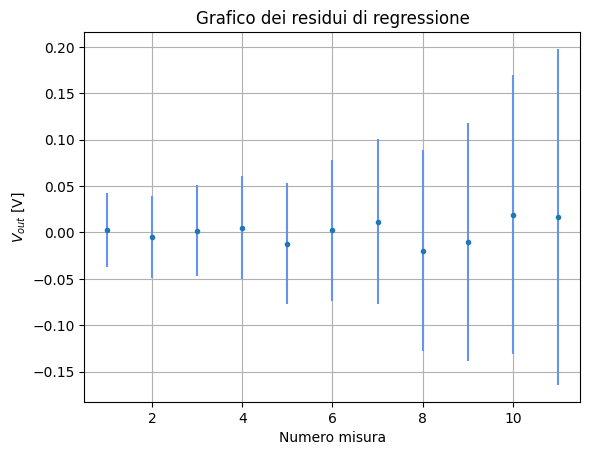

In [ ]:
chi_quadro_lineare(cavo_bnc_v_log, cavo_bnc_t, err_cavo_v_log, 1.5517285459424583, -1.9181238465213668, "$V_{out} \\ [$V$]$")

In [ ]:
#sonda

regrlin_pear_errpost_xys(sonda_t, sonda_v_log, err_sonda_v_log)

pendenza $b$	 -1.8154607694115628
$\sigma_b$	 0.07133830543123383
intercetta $a$	 1.598949896274896
$\sigma_a$	 0.03213382323165255
Coefficiente di Pearson $\rho_{xy}$	 -0.999923909161532
$\sigma_{\rho_{xy}}$	 0.004111986369415824
Errore a posteriori $\delta$	 0.007852344266586483


In [ ]:
#calcolo di tau
tau_fit_cavo = -1/-1.8154607694115628
err_tau_fit_cavo = 0.07133830543123383 / (-1.8154607694115628)**2
print(tau_fit_cavo*1000, "[microsecondi]")
print(err_tau_fit_cavo*1000)

print(100*err_tau_fit_cavo/tau_fit_cavo)

550.8243509575399 [microsecondi]
21.644574451645457
3.9294875787570116


chi quadro 
 0.08429546733713819
NDOF  
 9


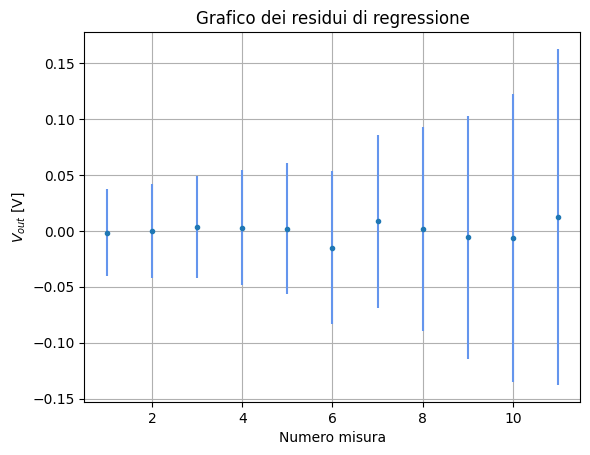

In [ ]:
chi_quadro_lineare(sonda_v_log, sonda_t, err_sonda_v_log, 1.598949896274896, -1.8154607694115628, "$V_{out} \\ [$V$]$")

Grafici

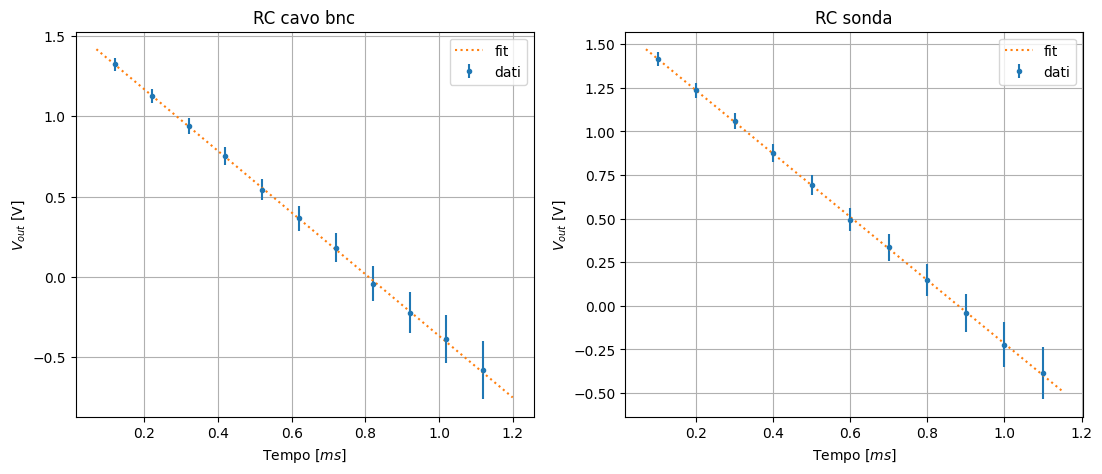

In [ ]:
plt.figure(figsize=(13,5))

f1 = plt.subplot(1,2,1)
f1.errorbar(cavo_bnc_t, cavo_bnc_v_log, linestyle="", marker=".", yerr=err_cavo_v_log, label="dati")
f1.grid()
f1.set_title("RC cavo bnc")
f1.set_xlabel("Tempo [$ms$]")
f1.set_ylabel("$V_{out}  \\ [$V$]$")
f1.plot(np.linspace(0.07,1.2,50), retta_fit_xba(np.linspace(0.07,1.2,50), -1.9181238465213668, 1.5517285459424583), marker="", linestyle=":", label="fit")
f1.legend()

f2 = plt.subplot(1,2,2)
f2.errorbar(sonda_t, sonda_v_log, linestyle="", marker=".", yerr=err_sonda_v_log, label="dati")
f2.grid()
f2.set_title("RC sonda")
f2.set_xlabel("Tempo [$ms$]")
f2.set_ylabel("$V_{out} \\ [$V$]$")
f2.plot(np.linspace(0.07,1.15,50), retta_fit_xba(np.linspace(0.07,1.15,50), -1.8154607694115628, 1.598949896274896), marker="", linestyle=":", label="fit")
f2.legend()

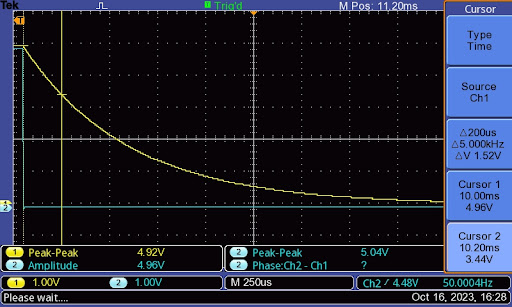

#RC frequenza

In [ ]:
#calcolo della frequenza di taglio teorica del circuito
f_taglio_teorica = 1/(2*math.pi*tau_teorico*(10**-6))
print(f_taglio_teorica, "[Hz]")

296.8797463807871 [Hz]


In [ ]:
#dati
frequenza = [0.01, 0.0215, 0.0464, 0.1, 0.215, 0.280, 0.290, 0.300, 0.310, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4]  #[kHz]
v_pp = 5.04 #[V]

sonda_v = [5.00, 4.96, 4.96, 4.76, 4.04, 3.62, 3.58, 3.52, 3.46, 2.68, 1.43, 0.696, 0.328, 0.156, 0.0728, 0.0344] #[V]
v_div_sonda = [ 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.2, 0.1, 0.05, 0.05, 0.02, 0.02, 0.02]                        #[V]

cavo_bnc_v = [4.68, 4.68, 4.68, 4.44, 3.84, 3.48, 3.42, 3.36, 3.32, 2.62, 1.40, 0.680, 0.316, 0.148, 0.0696, 0.027]      #[V]
v_div_cavo_bnc = [1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.1, 0.05, 0.02, 0.02, 0.02, 0.005]                    #[V]

A_sonda = []      #[db]
A_cavo_bnc = []   #[db]

for i in range(len(sonda_v)):
  dummy = 10*math.log10(sonda_v[i]/v_pp)
  A_sonda.append(dummy)
for i in range(len(cavo_bnc_v)):
  dummy = 10*math.log10(cavo_bnc_v[i]/v_pp)
  A_cavo_bnc.append(dummy)

print("A cavo bnc")
print(A_cavo_bnc)
print("A sonda")
print(A_sonda)

#calcolo errori
err_A_sonda = []
err_A_cavo = []

err_v_pp = math.sqrt( (1/10)**2 + ((3/100)*v_pp)**2 )

#dummy_voutsuin = []
#dummy_err_vout = []
#dummy_err_log = []
for k in range(len(sonda_v)):
  dummy = sonda_v[k]/v_pp
  #dummy_voutsuin.append(dummy)
  dummy2 = math.sqrt( ((1/10)*v_div_sonda[k])**2 + ((3/100)*sonda_v[k])**2 )
  #dummy_err_vout.append(dummy2)
  dummy3 = dummy * math.sqrt( (dummy2/sonda_v[k])**2 + (err_v_pp/v_pp)**2 )
  #dummy_err_log.append(dummy3)
  dummy4 = math.sqrt( (10* ( dummy3 / (dummy*math.log(10)) ) )**2 )
  err_A_sonda.append(dummy4)

#dummy_voutsuin = []
#dummy_err_vout = []
#dummy_err_log = []
for k in range(len(cavo_bnc_v)):
  dummy = cavo_bnc_v[k]/v_pp
  #dummy_voutsuin.append(dummy)
  dummy2 = math.sqrt( ((1/10)*v_div_cavo_bnc[k])**2 + ((3/100)*cavo_bnc_v[k])**2 )
  #dummy_err_vout.append(dummy2)
  dummy3 = dummy * math.sqrt( (dummy2/cavo_bnc_v[k])**2 + (err_v_pp/v_pp)**2 )
  #dummy_err_log.append(dummy3)
  dummy4 = math.sqrt((10*(dummy3 / (dummy*math.log(10)) ))**2)
  err_A_cavo.append(dummy4)

A cavo bnc
[-0.3218468337140129, -0.3218468337140129, -0.3218468337140129, -0.5504756633090542, -1.1809931207799451, -1.6085129249894436, -1.6840443038939024, -1.7609125905568126, -1.81292452741489, -2.8412924512577975, -5.563025007672873, -8.69921623739289, -12.027434538271216, -15.32168821050568, -18.598212968349632, -22.71066772286538]
A sonda
[-0.034605321095064735, -0.06948859955327855, -0.06948859955327855, -0.24823583725032153, -0.960491713349203, -1.437219659123596, -1.485475098016509, -1.5588787296739428, -1.6335443765274869, -2.7429574241673644, -5.470944989804635, -8.598212968349632, -11.865566927338463, -15.093059380910637, -18.40299157132488, -21.65872093873995]


Fit curva di bode

In [ ]:
def bode_passa_basso(x, f):
  y = []
  for i in x:
    dummy = 0
    dummy = 1/ math.sqrt( 1 + (i/f)**2 )
    y.append(dummy)
  return y

In [ ]:
#bnc
frequenza_hz = []
for i in frequenza:
  dummy = i*1000
  frequenza_hz.append(dummy)

f_A_sonda = []      #[db]
f_A_cavo_bnc = []   #[db]

for i in range(len(sonda_v)):
  dummy = (sonda_v[i]/v_pp)
  f_A_sonda.append(dummy)
for i in range(len(cavo_bnc_v)):
  dummy = (cavo_bnc_v[i]/v_pp)
  f_A_cavo_bnc.append(dummy)

f_err_A_sonda = []
f_err_A_cavo = []

for k in range(len(sonda_v)):
  dummy3 = f_A_sonda[k] * math.sqrt( (math.sqrt( ((1/10)*v_div_sonda[k])**2 + ((3/100)*sonda_v[k])**2 )/sonda_v[k])**2 + (err_v_pp/v_pp)**2 )
  f_err_A_sonda.append(dummy3)

for k in range(len(cavo_bnc_v)):
  dummy3 = f_A_cavo_bnc[i] * math.sqrt( (math.sqrt( ((1/10)*v_div_cavo_bnc[k])**2 + ((3/100)*cavo_bnc_v[k])**2 )/cavo_bnc_v[k])**2 + (err_v_pp/v_pp)**2 )
  f_err_A_cavo.append(dummy3)

#cavo
parametri, matrixcov = curve_fit(bode_passa_basso, frequenza_hz, f_A_cavo_bnc, sigma=f_err_A_cavo)
print("cavo")
print(parametri)
print(math.sqrt(matrixcov))
ft_fit_cavo = parametri
err_ft_fit_cavo = math.sqrt(matrixcov)

#sonda
parametri, matrixcov = curve_fit(bode_passa_basso, frequenza_hz, f_A_sonda, sigma=f_err_A_sonda)
print("sonda")
print(parametri)
print(math.sqrt(matrixcov))
ft_fit_sonda = parametri
err_ft_fit_sonda = math.sqrt(matrixcov)

cavo
[268.89944996]
9.303699761706666
sonda
[301.16059611]
2.1169417248325915


Grafico

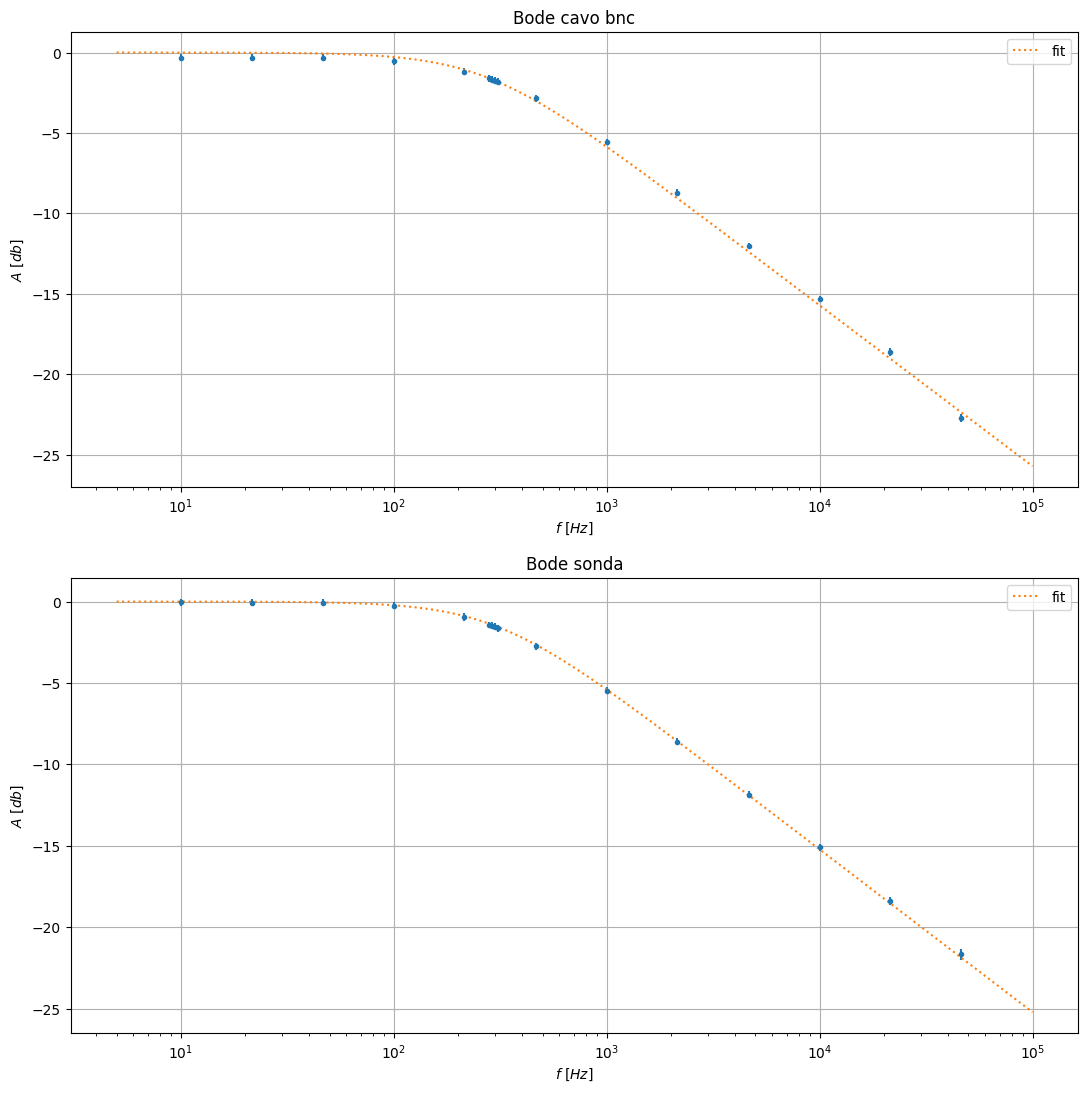

In [ ]:
frequenza_hz = []
for i in frequenza:
  dummy = i*1000
  frequenza_hz.append(dummy)

plt.figure(figsize=(13,13))
f1 = plt.subplot(2,1,1)
f1.grid()
f1.set_xscale("log", base=10)
f1.set_title("Bode cavo bnc")
f1.set_xlabel("$f \\ [Hz]$")
f1.set_ylabel("$A \\ [db]$")
f1.errorbar(frequenza_hz, A_cavo_bnc, linestyle="", marker=".", yerr=err_A_cavo)
f1.plot(np.linspace(5,100000,100000), 10*np.log10( bode_passa_basso(np.linspace(5,100000,100000), ft_fit_cavo) ), marker="", linestyle=":", label="fit")
f1.legend()

f2 = plt.subplot(2,1,2)
f2.grid()
f2.set_xscale("log", base=10)
f2.set_title("Bode sonda")
f2.set_xlabel("$f \\ [Hz]$")
f2.set_ylabel("$A \\ [db]$")
f2.errorbar(frequenza_hz, A_sonda, linestyle="", marker=".", yerr=err_A_sonda)
f2.plot(np.linspace(5,100000,100000), 10*np.log10( bode_passa_basso(np.linspace(5,100000,100000), ft_fit_sonda) ), marker="", linestyle=":", label="fit")
f2.legend()

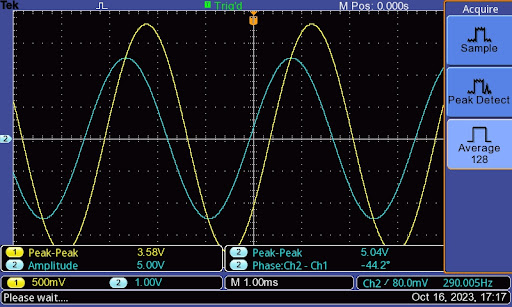